In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df_raw1= pd.read_csv("IoTPond3.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:04 CET,1941,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2
1,2021-06-19 00:00:26 CET,1942,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2
2,2021-06-19 00:02:03 CET,1945,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2
3,2021-06-19 00:02:26 CET,1946,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2
4,2021-06-19 00:03:31 CET,1948,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2


In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [6]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

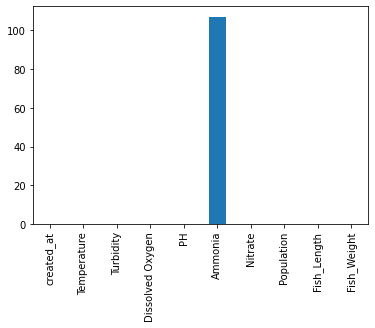

In [7]:
df_raw1.isna().sum().plot.bar()

In [8]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [9]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [10]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [11]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2,2021-06-19 00:00:04,2021-06-19,00:00:04
1,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2,2021-06-19 00:00:26,2021-06-19,00:00:26
2,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2,2021-06-19 00:02:03,2021-06-19,00:02:03
3,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2,2021-06-19 00:02:26,2021-06-19,00:02:26
4,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2,2021-06-19 00:03:31,2021-06-19,00:03:31


Sort DataFrame by Date (Datetime)

In [12]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [13]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,169185.0000,169185.0000,169185.0000,169185.0000,169078.0000,169185.0000,169185.0000,169185.0000,169185.0000,169185
mean,23.7795,83.3849,7.4562,7.1849,inf,380.6708,50.0000,16.0588,44.2590,2021-07-24 22:11:29.988184576
min,-127.0000,8.0000,0.0080,-0.5318,0.0000,0.0000,50.0000,6.7400,3.2000,2021-06-19 00:00:04
25%,23.3750,80.0000,5.0800,7.2443,5.7591,123.0000,50.0000,13.3200,19.3800,2021-07-09 05:05:59
50%,23.7500,98.0000,5.0800,7.3079,29.4257,417.0000,50.0000,15.5400,35.8300,2021-07-24 08:11:42
75%,24.1250,100.0000,8.0880,7.3442,1009.7664,585.0000,50.0000,18.8600,46.6800,2021-08-09 15:25:59
max,26.5625,100.0000,41.3840,11.4569,inf,3870.0000,50.0000,33.0000,294.9200,2021-10-12 15:05:46
std,1.5492,26.6519,6.4105,0.6294,nan,255.4436,0.0000,5.0017,45.5193,NaN


We have 169185 records. There are 107 records where Ammonia reading is missing and some noisy data. Start date- 24th of July,'21 and end date- 12th of Oct,'21

In [ ]:
d=df["Date"].unique()
print(len(d))
d

In [ ]:
a=df["Fish_Weight"].unique()
print(len(a))
a

In [ ]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

I am going to drop all the records where Ammonia is missing

In [14]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [17]:
df.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,161030.000000,161030.000000,161030.000000,161030.000000,1.610300e+05,161030.000000,161030.0,161030.000000,161030.000000
mean,23.784089,83.628641,7.468621,7.178575,2.563640e+08,384.229038,50.0,16.096337,44.777244
std,1.586253,27.051203,6.485450,0.644418,8.648935e+09,260.826754,0.0,5.123743,46.597184
min,-127.000000,8.000000,0.008000,-0.531800,0.000000e+00,0.000000,50.0,6.740000,3.200000
25%,23.375000,83.000000,5.080000,7.235230,5.019890e+00,122.000000,50.0,13.140000,18.100000
50%,23.750000,99.000000,5.080000,7.307860,2.599290e+01,432.000000,50.0,15.650000,36.720000
75%,24.125000,100.000000,7.987000,7.348710,2.739723e+02,592.000000,50.0,19.150000,47.200000
max,26.562500,100.000000,41.384000,11.456930,4.270000e+11,3870.000000,50.0,33.000000,294.920000


In [18]:
df.to_csv('Pond3.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [19]:
df= pd.read_csv("Pond3.csv", delimiter = ",",low_memory=False )

In [20]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [21]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2,2021-06-19 00:00:04,2021-06-19,00:00:04
1,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2,2021-06-19 00:00:26,2021-06-19,00:00:26
2,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2,2021-06-19 00:02:03,2021-06-19,00:02:03
3,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2,2021-06-19 00:02:26,2021-06-19,00:02:26
4,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2,2021-06-19 00:03:31,2021-06-19,00:03:31


In [22]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [23]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2,2021-06-19 00:00:04,2021-06-19,00:00:04,NaT
1,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2,2021-06-19 00:00:26,2021-06-19,00:00:26,0 days
2,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2,2021-06-19 00:02:03,2021-06-19,00:02:03,0 days
3,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2,2021-06-19 00:02:26,2021-06-19,00:02:26,0 days
4,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2,2021-06-19 00:03:31,2021-06-19,00:03:31,0 days


In [24]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [25]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [26]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2,2021-06-19 00:00:04,2021-06-19,00:00:04,0.0
1,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2,2021-06-19 00:00:26,2021-06-19,00:00:26,0.0
2,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2,2021-06-19 00:02:03,2021-06-19,00:02:03,0.0
3,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2,2021-06-19 00:02:26,2021-06-19,00:02:26,0.0
4,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2,2021-06-19 00:03:31,2021-06-19,00:03:31,0.0


In [27]:
df['Date_diff'].unique()

array([ 0.,  1.,  3.,  2.,  4., 10., 17.,  8.])

In [28]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
14708,24.1875,97,21.299,7.24885,73.59457,91,50,10.25,8.69,2021-06-28 12:45:25,2021-06-28,12:45:25,3.0
37562,23.7500,23,6.195,7.30332,26.77938,126,50,12.78,15.54,2021-07-06 14:55:06,2021-07-06,14:55:06,2.0
144205,23.1875,100,0.062,7.27608,0.00534,670,50,22.89,95.56,2021-08-20 14:51:33,2021-08-20,14:51:33,2.0
145802,23.9375,100,5.080,7.26246,0.00075,490,50,25.90,149.53,2021-08-27 11:54:07,2021-08-27,11:54:07,4.0
153017,23.3750,100,5.080,7.05365,0.00029,681,50,26.87,162.40,2021-09-03 14:42:48,2021-09-03,14:42:48,2.0
155734,24.3750,100,3.135,2.70938,0.00004,1563,50,28.88,200.52,2021-09-15 14:37:57,2021-09-15,14:37:57,10.0
161002,25.0000,100,5.080,4.77030,0.00000,3640,50,32.45,280.96,2021-10-04 13:24:36,2021-10-04,13:24:36,17.0
161003,25.3750,100,5.080,2.01484,0.00005,3870,50,33.00,294.92,2021-10-12 14:10:31,2021-10-12,14:10:31,8.0


In [29]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [30]:
df['Weight_diff'].unique()

array([ 0.  ,  0.61,  0.61,  0.61,  1.83,  0.61,  0.57,  1.28,  2.56,
        1.28,  1.26,  0.89,  0.89,  0.89,  0.89,  0.83,  0.52,  0.52,
        0.54,  7.71,  7.71,  7.71, 15.42, 30.84,  7.77,  0.85,  1.7 ,
       36.42,  7.83,  7.83, 64.78, 13.96])

In [32]:
d=df["Date"].unique()
print(len(d))
d

76


array([datetime.date(2021, 6, 19), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 3), datetime.date(2021, 7, 4),
       datetime.date(2021, 7, 6), datetime.date(2021, 7, 7),
       datetime.date(2021, 7, 8), datetime.date(2021, 7, 9),
       datetime.date(2021, 7, 10), datetime.date(2021, 7, 11),
       datetime.date(2021, 7, 12), datetime.date(2021, 7, 13),
       datetime.date(2021, 7, 14), datetime.date(2021, 7, 15),
       datetime.date(2021, 7, 16), datetime.date(2021, 7, 17),
       datetime.date(2021, 7, 18), datetime.date(2021, 7, 19),
       datetime.date(2021, 7, 20), datetime.date(2021, 7, 21),
       datetime.date(2021, 7, 22), datetime.date(2021, 7, 23),


In [33]:
date_group=df.groupby("Date", sort = False)

In [34]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,23.7500,80,27.736,7.04911,5.15546,114,50,6.74,3.20,2021-06-19 00:00:04,00:00:04,0.0,0.00
2021-06-20,25.8125,16,11.493,7.25792,5.54304,112,50,7.17,3.81,2021-06-20 00:00:12,00:00:12,1.0,0.61
2021-06-21,25.4375,17,34.898,7.25338,9.09429,108,50,7.52,4.42,2021-06-21 00:00:04,00:00:04,1.0,0.61
2021-06-22,23.8750,31,7.025,7.33963,106962.94530,231,50,7.91,5.03,2021-06-22 14:00:42,14:00:42,1.0,0.61
2021-06-23,24.2500,44,4.792,7.29424,27.71025,97,50,8.30,5.64,2021-06-23 00:01:32,00:01:32,1.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-15,24.3750,100,3.135,2.70938,0.00004,1563,50,28.88,200.52,2021-09-15 14:37:57,14:37:57,10.0,36.42
2021-09-16,24.1875,100,5.080,4.13931,0.00012,457,50,29.21,208.35,2021-09-16 00:01:15,00:01:15,1.0,7.83
2021-09-17,24.3125,100,5.080,4.81115,0.00010,507,50,29.54,216.18,2021-09-17 00:00:51,00:00:51,1.0,7.83


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [35]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],13]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,13])
    
    

0.6099999999999999
0.6099999999999999
0.6100000000000003
0.6099999999999994
0.6100000000000003
0.6100000000000003
1.8299999999999992
0.6100000000000012
0.6099999999999994
0.6099999999999994
0.6100000000000012
0.5699999999999985
1.2800000000000011
2.5599999999999987
1.2800000000000011
1.2800000000000011
1.2799999999999976
1.2800000000000011
1.2800000000000011
1.2799999999999976
1.2800000000000011
1.2800000000000011
1.2799999999999976
1.2800000000000011
1.2600000000000016
0.889999999999997
0.8900000000000006
0.8900000000000041
0.8899999999999935
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8299999999999983
0.8900000000000006
0.5200000000000031
0.519999999999996
0.5200000000000031
0.519999999999996
0.5200000000000031
0.519999999999996
0.5200000000000031
0.519999999999996
0.5200000000000031
0.5200000000000031
0.519999999999996
0.5200000000000031
0.519999999999996
0.5399999999999991


In [37]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,23.7500,80,27.736,7.04911,5.15546,114,50,6.74,3.20,2021-06-19 00:00:04,00:00:04,0.0,0.61
2021-06-20,25.8125,16,11.493,7.25792,5.54304,112,50,7.17,3.81,2021-06-20 00:00:12,00:00:12,1.0,0.61
2021-06-21,25.4375,17,34.898,7.25338,9.09429,108,50,7.52,4.42,2021-06-21 00:00:04,00:00:04,1.0,0.61
2021-06-22,23.8750,31,7.025,7.33963,106962.94530,231,50,7.91,5.03,2021-06-22 14:00:42,14:00:42,1.0,0.61
2021-06-23,24.2500,44,4.792,7.29424,27.71025,97,50,8.30,5.64,2021-06-23 00:01:32,00:01:32,1.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-15,24.3750,100,3.135,2.70938,0.00004,1563,50,28.88,200.52,2021-09-15 14:37:57,14:37:57,10.0,7.83
2021-09-16,24.1875,100,5.080,4.13931,0.00012,457,50,29.21,208.35,2021-09-16 00:01:15,00:01:15,1.0,7.83
2021-09-17,24.3125,100,5.080,4.81115,0.00010,507,50,29.54,216.18,2021-09-17 00:00:51,00:00:51,1.0,64.78


In [40]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,23.7500,80,27.736,7.04911,5.15546,114,50,6.74,3.20,2021-06-19 00:00:04,00:00:04,1.0,0.61
2021-06-20,25.8125,16,11.493,7.25792,5.54304,112,50,7.17,3.81,2021-06-20 00:00:12,00:00:12,1.0,0.61
2021-06-21,25.4375,17,34.898,7.25338,9.09429,108,50,7.52,4.42,2021-06-21 00:00:04,00:00:04,1.0,0.61
2021-06-22,23.8750,31,7.025,7.33963,106962.94530,231,50,7.91,5.03,2021-06-22 14:00:42,14:00:42,1.0,0.61
2021-06-23,24.2500,44,4.792,7.29424,27.71025,97,50,8.30,5.64,2021-06-23 00:01:32,00:01:32,1.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-15,24.3750,100,3.135,2.70938,0.00004,1563,50,28.88,200.52,2021-09-15 14:37:57,14:37:57,1.0,7.83
2021-09-16,24.1875,100,5.080,4.13931,0.00012,457,50,29.21,208.35,2021-09-16 00:01:15,00:01:15,1.0,7.83
2021-09-17,24.3125,100,5.080,4.81115,0.00010,507,50,29.54,216.18,2021-09-17 00:00:51,00:00:51,17.0,64.78


In [41]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,12])
    if (df[df["Date"]==d[i]].iloc[0,12])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 3.0
2021-06-25 ------ 1.0
2021-06-28 ------ 1.0
2021-06-29 ------ 1.0
2021-06-30 ------ 1.0
2021-07-01 ------ 1.0
2021-07-02 ------ 1.0
2021-07-03 ------ 2.0
2021-07-04 ------ 1.0
2021-07-06 ------ 1.0
2021-07-07 ------ 1.0
2021-07-08 ------ 1.0
2021-07-09 ------ 1.0
2021-07-10 ------ 1.0
2021-07-11 ------ 1.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 1.0
2021-07-18 ------ 1.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 1.0
2021-08-05 ------ 1.0
2021-08-06

In [42]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 24),
 datetime.date(2021, 7, 3),
 datetime.date(2021, 8, 17),
 datetime.date(2021, 8, 22),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 4),
 datetime.date(2021, 9, 16),
 datetime.date(2021, 9, 17),
 datetime.date(2021, 10, 4),
 datetime.date(2021, 10, 12)]

In [43]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [44]:
df.tail(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
156700,24.1875,100,0.16,3.99405,0.00008,445,50,28.88,200.52,2021-09-15 23:57:09,2021-09-15,23:57:09,0.0,0.0
156701,24.2500,100,5.08,4.12569,0.00011,421,50,28.88,200.52,2021-09-15 23:58:43,2021-09-15,23:58:43,0.0,0.0
156702,24.1875,100,5.08,4.08938,0.00012,420,50,28.88,200.52,2021-09-15 23:59:03,2021-09-15,23:59:03,0.0,0.0
156703,24.1875,100,5.08,4.05760,0.00008,448,50,28.88,200.52,2021-09-15 23:59:22,2021-09-15,23:59:22,0.0,0.0
156704,24.2500,100,5.08,4.09392,0.00012,418,50,28.88,200.52,2021-09-15 23:59:42,2021-09-15,23:59:42,0.0,0.0


In [45]:
df.drop("Date_diff",axis=1,inplace=True)


In [46]:
df.to_csv('cleaned_Pond3.csv')